<a href="https://colab.research.google.com/github/Saimoncastro/Dataset-proyecto-coder/blob/main/ProyectoDSIIParteI%2BCastro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
{
  "nbformat": 4,
  "nbformat_minor": 0,
  "metadata": {
    "colab": {
      "provenance": []
    },
    "kernelspec": {
      "name": "python3",
      "display_name": "Python 3"
    },
    "language_info": {
      "name": "python"
    }
  },
  "cells": [
    {
      "cell_type": "markdown",
      "metadata": {
        "id": "urMuMQASOd21"
      },
      "source": [
        "# 🚀 Proyecto Final: Estudio de casos COVID\n",
        "\n",
        "**Autor/a:** Simón Castro\n",
        "\n",
        "**Curso:** Machine Learning para la Ciencia de Datos\n",
        "\n",
        "---\n",
        "\n",
        "Bienvenido/a a tu notebook de Proyecto Final. Este documento será tu espacio de trabajo central donde desarrollarás cada etapa del proceso de Ciencia de Datos, desde la adquisición de los datos hasta el entrenamiento de un modelo de Machine Learning.\n",
        "\n",
        "Sigue cada una de las secciones, documenta tus pasos y asegúrate de que tu código sea claro y legible. ¡Mucho éxito!"
      ]
    },
    {
      "cell_type": "markdown",
      "metadata": {},
      "source": [
        "## 1. Definición del Proyecto y Preguntas de Interés\n",
        "\n",
        "*En esta sección se define el alcance, la motivación y los objetivos de tu análisis. Es el plan de trabajo de tu proyecto.*\n",
        "\n",
        "### 1.1. Motivación y Audiencia\n",
        "\n",
        "* **Motivación:** La pandemia de COVID-19 ha sido uno de los fenómenos globales más significativos del siglo XXI, con un impacto profundo en la salud pública, la economía y la sociedad. Analizar datos relacionados con esta crisis no solo permite profundizar en el entendimiento epidemiológico de la enfermedad, sino que también constituye una oportunidad inmejorable para aplicar herramientas de ciencia de datos y Machine Learning a un problema real y altamente relevante.\n",
        "* **Audiencia:** Este análisis está dirigido al público general.\n",
        "\n",
        "### 1.2. Preguntas o Hipótesis Iniciales\n",
        "\n",
        "*Lista aquí al menos 3 a 5 preguntas claras o hipótesis que buscarás responder con tu análisis. Estas preguntas guiarán todo tu trabajo de limpieza y transformación.*\n",
        "\n",
        "* Hipótesis 1: A mayor % de vacunados, menor tasa de mortalidad.\n",
        "* Hipótesis 2: Los países con mayor población presentan mayor número de casos absolutos, pero no necesariamente una mayor tasa de mortalidad.\n",
        "* Hipótesis 3: Existe una correlación negativa entre el ingreso per cápita y la tasa de mortalidad por COVID-19.\n"
      ]
    }
  ]
}



{'nbformat': 4,
 'nbformat_minor': 0,
 'metadata': {'colab': {'provenance': []},
  'kernelspec': {'name': 'python3', 'display_name': 'Python 3'},
  'language_info': {'name': 'python'}},
 'cells': [{'cell_type': 'markdown',
   'metadata': {'id': 'urMuMQASOd21'},
   'source': ['# 🚀 Proyecto Final: Estudio de casos COVID\n',
    '\n',
    '**Autor/a:** Simón Castro\n',
    '\n',
    '**Curso:** Machine Learning para la Ciencia de Datos\n',
    '\n',
    '---\n',
    '\n',
    'Bienvenido/a a tu notebook de Proyecto Final. Este documento será tu espacio de trabajo central donde desarrollarás cada etapa del proceso de Ciencia de Datos, desde la adquisición de los datos hasta el entrenamiento de un modelo de Machine Learning.\n',
    '\n',
    'Sigue cada una de las secciones, documenta tus pasos y asegúrate de que tu código sea claro y legible. ¡Mucho éxito!']},
  {'cell_type': 'markdown',
   'metadata': {},
   'source': ['## 1. Definición del Proyecto y Preguntas de Interés\n',
    '\n',
 

✅ Datos descargados de OWID.
  iso_code        location continent  population  total_cases  total_deaths  \
0      AFG     Afghanistan      Asia    41128772       235214          7998   
1      ALB         Albania    Europe     2842318       335047          3605   
2      DZA         Algeria    Africa    44903228       272139          6881   
3      ASM  American Samoa   Oceania       44295         8359            34   
4      AND         Andorra    Europe       79843        48015           159   

   people_vaccinated  people_fully_vaccinated        date  
0                  0                        0  2024-08-04  
1                  0                        0  2024-08-04  
2                  0                        0  2024-08-04  
3                  0                        0  2024-08-04  
4                  0                        0  2024-08-04  
(247, 9)
         location  pct_fully_vaccinated  mortality_rate
0     Afghanistan                   0.0        0.034003
1         Alban

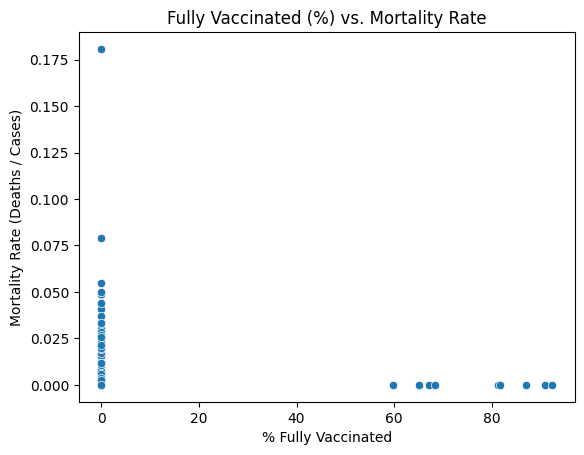

Correlación entre % fully vaccinated y mortality rate: -0.1441


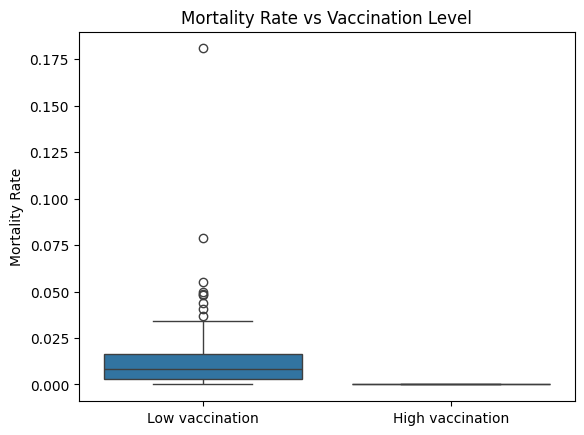

t-statistic: -11.8233
p-value: 0.0000


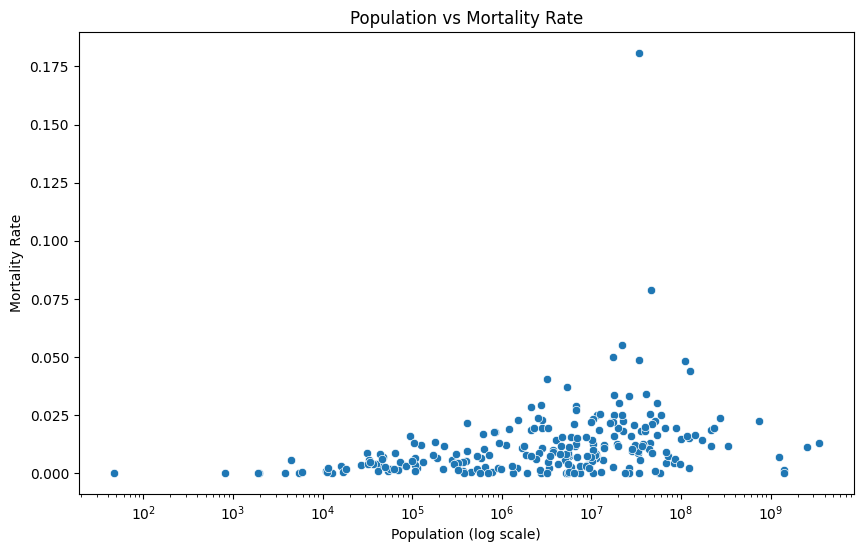

Correlación entre population y mortality rate: 0.0047


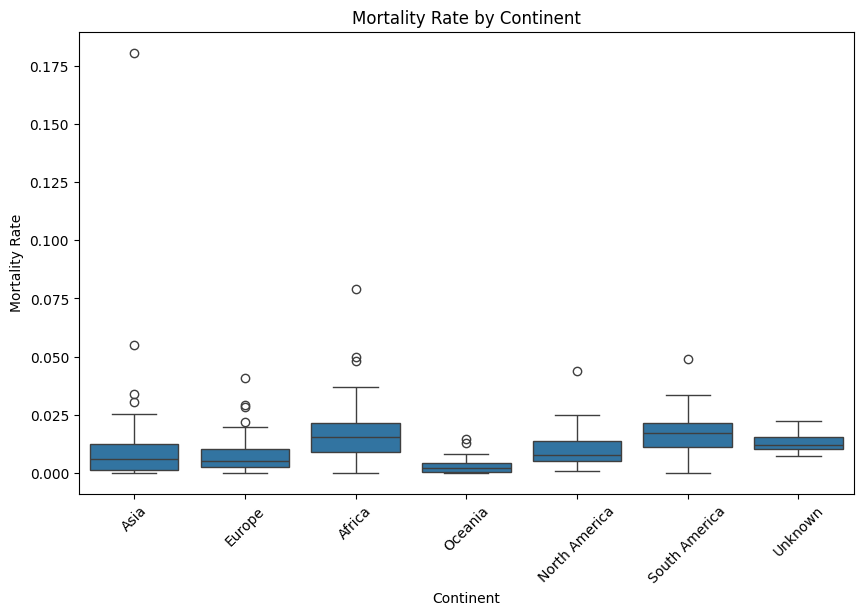

F-statistic: 3.5054
p-value: 0.0024
                   count      mean       std  min     25%     50%       75%  \
vaccination_level                                                             
High vaccination     5.0  0.000000  0.000000  0.0  0.0000  0.0000  0.000000   
Low vaccination    242.0  0.011819  0.015551  0.0  0.0031  0.0081  0.016156   

                        max  
vaccination_level            
High vaccination   0.000000  
Low vaccination    0.180745  


In [20]:
#importar librerias
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_selection import LinearRegression
from scipy import stats

# URL de OWID
url = "https://covid.ourworldindata.org/data/owid-covid-data.json" #endpoint

# Descargar datos
response = requests.get(url)

# Verificar estado
if response.status_code == 200:
    owid_data = response.json()
    print("✅ Datos descargados de OWID.")
else:
    print("❌ Error al descargar OWID data. Código:", response.status_code)

#convertir en dataframe
# Lista para guardar los últimos datos de cada país
records = []

for country_code, country_data in owid_data.items():
    # Saltar agregados globales
    if country_code in ["OWID_WRL", "OWID_AFR", "OWID_ASI", "OWID_EUR", "OWID_EUN", "OWID_NAM", "OWID_OCE", "OWID_SAM"]:
        continue

    # Tomar la última fecha disponible
    data_list = country_data.get("data", [])
    if len(data_list) == 0:
        continue

    last_entry = data_list[-1]

    record = {
        "iso_code": country_code,
        "location": country_data.get("location"),
        "continent": country_data.get("continent"),
        "population": country_data.get("population"),
        "total_cases": last_entry.get("total_cases", 0),
        "total_deaths": last_entry.get("total_deaths", 0),
        "people_vaccinated": last_entry.get("people_vaccinated", 0),
        "people_fully_vaccinated": last_entry.get("people_fully_vaccinated", 0),
        "date": last_entry.get("date")
    }
    records.append(record)

# Crear DataFrame
df = pd.DataFrame(records)

#revisión del data frame
print(df.head())
print(df.shape)

#Limpieza de ceros
# Reemplazar NaN por cero en variables numéricas
cols_to_clean = [
    "total_cases",
    "total_deaths",
    "people_vaccinated",
    "people_fully_vaccinated",
    "population"
]

df[cols_to_clean] = df[cols_to_clean].fillna(0)

#calculo de metricas utiles para las hipotesis
#Mortalidad
df["mortality_rate"] = df.apply(
    lambda x: (x["total_deaths"] / x["total_cases"]) if x["total_cases"] > 0 else 0,
    axis=1
)
#Porcentaje vacunados totales
df["pct_fully_vaccinated"] = df.apply(
    lambda x: (x["people_fully_vaccinated"] / x["population"] * 100) if x["population"] > 0 else 0,
    axis=1
)

#Revisión
print(df[["location", "pct_fully_vaccinated", "mortality_rate"]].head())
print(df.isnull().sum())

#arreglar continente vacio
df["continent"] = df["continent"].fillna("Unknown")

#Revisión exploratoria

#plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="pct_fully_vaccinated",
    y="mortality_rate"
)
plt.title("Fully Vaccinated (%) vs. Mortality Rate")
plt.xlabel("% Fully Vaccinated")
plt.ylabel("Mortality Rate (Deaths / Cases)")
plt.show()

#Calculo de correlación
corr_value = df["pct_fully_vaccinated"].corr(df["mortality_rate"])
print(f"Correlación entre % fully vaccinated y mortality rate: {corr_value:.4f}")

#visualización de la correlación
# Crear grupos
df["vaccination_level"] = df["pct_fully_vaccinated"].apply(
    lambda x: "High vaccination" if x >= 70 else "Low vaccination"
)

sns.boxplot(
    data=df,
    x="vaccination_level",
    y="mortality_rate"
)
plt.title("Mortality Rate vs Vaccination Level")
plt.xlabel("")
plt.ylabel("Mortality Rate")
plt.show()

#Test estadistico para validar si las diferencias son significativas Hipotesis 1: “A mayor % vacunados, menor tasa de mortalidad”
group_high = df[df["vaccination_level"]=="High vaccination"]["mortality_rate"]
group_low = df[df["vaccination_level"]=="Low vaccination"]["mortality_rate"]

t_stat, p_val = stats.ttest_ind(group_high, group_low, equal_var=False)

print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

#Si p < 0.05, diferencia significativa → la vacunación sí está asociada con menor mortalidad.

#Hipotesis 2: Los países con mayor población presentan menor tasa de mortalidad
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="population",
    y="mortality_rate"
)
plt.xscale("log")
plt.title("Population vs Mortality Rate")
plt.xlabel("Population (log scale)")
plt.ylabel("Mortality Rate")
plt.show()
corr_value = df["population"].corr(df["mortality_rate"])
print(f"Correlación entre population y mortality rate: {corr_value:.4f}")

#Si Correlación negativa respaldaría la hipótesis.
#Hipotesis 3: La tasa de mortalidad es diferente entre continentes
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="continent",
    y="mortality_rate"
)
plt.title("Mortality Rate by Continent")
plt.ylabel("Mortality Rate")
plt.xlabel("Continent")
plt.xticks(rotation=45)
plt.show()

#Realizar Anova test para saber si las diferencias entre continentes son significativas:
# Preparar datos por grupo
groups = [group["mortality_rate"].values for name, group in df.groupby("continent")]

# ANOVA
f_stat, p_val = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_val:.4f}")

#ANOVA p < 0.05 → diferencias entre continentes.
# Estadísticas
print(df.groupby("vaccination_level")["mortality_rate"].describe())

df.to_csv("owid_covid_data_clean.csv", index=False)

# 🚀 Proyecto Final: [Estudio de casos covid]

**Autor/a:** [Simón Castro]

**Curso:** Machine Learning para la Ciencia de Datos

---

Bienvenido/a a tu notebook de Proyecto Final. Este documento será tu espacio de trabajo central donde desarrollarás cada etapa del proceso de Ciencia de Datos, desde la adquisición de los datos hasta el entrenamiento de un modelo de Machine Learning.

Sigue cada una de las secciones, documenta tus pasos y asegúrate de que tu código sea claro y legible. ¡Mucho éxito!

## 1. Definición del Proyecto y Preguntas de Interés

*En esta sección se define el alcance, la motivación y los objetivos de tu análisis. Es el plan de trabajo de tu proyecto.*

### ### 1.1. Motivación y Audiencia
* **Motivación:** La pandemia de COVID-19 ha sido uno de los fenómenos globales más significativos del siglo XXI, con un impacto profundo en la salud pública, la economía y la sociedad. Analizar datos relacionados con esta crisis no solo permite profundizar en el entendimiento epidemiológico de la enfermedad, sino que también constituye una oportunidad inmejorable para aplicar herramientas de ciencia de datos y Machine Learning a un problema real y altamente relevante.*
* **Audiencia:** *Esta dirigido este análisis para el público general.*

### ### 1.2. Preguntas o Hipótesis Iniciales
*Lista aquí al menos 3 a 5 preguntas claras o hipótesis que buscarás responder con tu análisis. Estas preguntas guiarán todo tu trabajo de limpieza y transformación.*

* *Hipotesis 1: A mayor % vacunados, menor tasa de mortalidad.*
* *Hipotesis 2: Los países con mayor población presentan menor tasa de mortalidad*
* *Hipotesis 3: Los países con mayor población presentan menor tasa de mortalidad*